<a href="https://colab.research.google.com/github/yubars/projects/blob/main/ML_based_botnet_detection_using_deep_autoencoder_ipynb_Yuba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This project deploy ML based autoencoder model to detect botnet from publicly available dataset N-BaIoT.

In [ ]:
#Import required libraries
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, losses, Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Install kaggle so that data can be downloaded from kaggle using API token (username and key) created before
!pip install -q kaggle

In [ ]:
#upload kaggle.json API token provided by kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"yubasiwakoti","key":"796c347383dd101ce52fd3e64f762797"}'}

In [ ]:
#set permission for kaggle API token
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
cd data

/content/data


In [ ]:
#Download N-BaIoT bontet dataset in .zip
!kaggle datasets download -d mkashifn/nbaiot-dataset

nbaiot-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzip download N-baIoT dataset within working directory
!unzip nbaiot-dataset.zip

Archive:  nbaiot-dataset.zip
replace 1.benign.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 1.benign.csv            
  inflating: 1.gafgyt.combo.csv      
  inflating: 1.gafgyt.junk.csv       
  inflating: 1.gafgyt.scan.csv       
  inflating: 1.gafgyt.tcp.csv        
  inflating: 1.gafgyt.udp.csv        
  inflating: 1.mirai.ack.csv         
  inflating: 1.mirai.scan.csv        
  inflating: 1.mirai.syn.csv         
  inflating: 1.mirai.udp.csv         
  inflating: 1.mirai.udpplain.csv    
  inflating: 2.benign.csv            
  inflating: 2.gafgyt.combo.csv      
  inflating: 2.gafgyt.junk.csv       
  inflating: 2.gafgyt.scan.csv       
  inflating: 2.gafgyt.tcp.csv        
  inflating: 2.gafgyt.udp.csv        
  inflating: 2.mirai.ack.csv         
  inflating: 2.mirai.scan.csv        
  inflating: 2.mirai.syn.csv         
  inflating: 2.mirai.udp.csv         
  inflating: 2.mirai.udpplain.csv    
  inflating: 3.benign.csv            
  inflating: 3.gafgyt.combo.csv    

In [ ]:
cd ..

/content


In [ ]:
#list the data directories in dataset saved folder /content/data into dirs
dirs = os.listdir("data")

In [ ]:
#print data files in dirs
print(dirs)

['4.gafgyt.tcp.csv', '2.mirai.ack.csv', '1.gafgyt.scan.csv', '5.gafgyt.combo.csv', '1.gafgyt.tcp.csv', '6.mirai.udp.csv', '5.mirai.udpplain.csv', '1.benign.csv', '5.gafgyt.junk.csv', '9.mirai.syn.csv', '7.gafgyt.junk.csv', '8.gafgyt.udp.csv', '2.gafgyt.junk.csv', '2.gafgyt.tcp.csv', '3.gafgyt.combo.csv', '3.benign.csv', '5.benign.csv', '4.mirai.syn.csv', '7.gafgyt.tcp.csv', '2.mirai.syn.csv', '6.gafgyt.udp.csv', '2.mirai.scan.csv', '7.benign.csv', '5.mirai.ack.csv', '5.mirai.scan.csv', '7.gafgyt.combo.csv', '4.mirai.udpplain.csv', '6.gafgyt.combo.csv', '3.gafgyt.udp.csv', 'README.md', '8.gafgyt.scan.csv', '4.gafgyt.udp.csv', '6.gafgyt.scan.csv', '5.gafgyt.tcp.csv', '5.gafgyt.scan.csv', '9.gafgyt.junk.csv', '1.mirai.udpplain.csv', '6.mirai.udpplain.csv', '8.mirai.scan.csv', '8.mirai.udp.csv', '3.gafgyt.tcp.csv', 'device_info.csv', '9.gafgyt.scan.csv', '2.gafgyt.udp.csv', '9.benign.csv', '2.gafgyt.scan.csv', '2.mirai.udp.csv', '4.gafgyt.combo.csv', '4.benign.csv', 'data_summary.csv', '6.

In [ ]:
#read data_summary.csv in pandas and load to data_summary and convert 'Data_count' column to numpy array
data_summary = pd.read_csv("/content/data/data_summary.csv")
data_summary[' Data Count'].to_numpy()


In [ ]:
#see number of data files with counts and number of attributes
data_summary

,File Name,Data Count,Feature Count
0,1.benign.csv,49548,115
1,1.gafgyt.combo.csv,59718,115
2,1.gafgyt.junk.csv,29068,115
3,1.gafgyt.scan.csv,29849,115
4,1.gafgyt.tcp.csv,92141,115
...,...,...,...
84,9.mirai.ack.csv,107187,115
85,9.mirai.scan.csv,43674,115
86,9.mirai.syn.csv,122479,115
87,9.mirai.udp.csv,157084,115


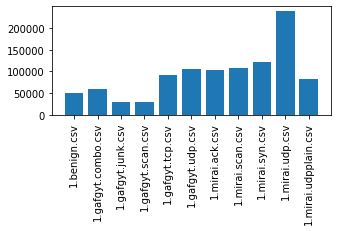

In [ ]:
#plot number of data instances in each categories of data in histogram to observe if the dataset is balenced or not
list1 = data_summary['File Name']
list2 = data_summary[' Data Count']
a = list1.head(11)
b = list2.head(11)
pyplot.figure(figsize=(5,2))
pyplot.xticks(rotation=90)
pyplot.bar(a,b)
pyplot.show()

In [ ]:
device_info = pd.read_csv("/content/data/device_info.csv")

In [ ]:
# place all data files from all devices into a set called name_set
name_set = set()
for name in dirs:
  # print(name)
  if name[1] == ".":
    name_set.add(name)
name_set

In [ ]:
# extract only attacks from name_set
name_set = set()
for name in dirs:
  # print(name)
  if name[1] == ".":
    num = name.split(".")[0]
    name = name.lstrip(f"{num}.")
    name_set.add(name)

name_set.remove('benign.csv')
name_set

{'gafgyt.combo.csv',
 'gafgyt.junk.csv',
 'gafgyt.scan.csv',
 'gafgyt.tcp.csv',
 'gafgyt.udp.csv',
 'mirai.ack.csv',
 'mirai.scan.csv',
 'mirai.syn.csv',
 'mirai.udp.csv',
 'mirai.udpplain.csv'}

In [ ]:
#function defined to load data from a file
def load_nbaiot(filename):
    return np.loadtxt(
        os.path.join("/content/data", filename),
        delimiter=",",
        skiprows=1
    )

In [ ]:
#Extract all Gafgyt attacks removing mirai attacks and put into name_set1. 
#Devices with id 3 (Ennio Doorbell) and 7 (Samsung Webcam) were only attacked by Bashlite (or Gafgyt).  
name_set1 = []
for name1 in name_set:
  if name1[0]!="m":
    name_set1.append(name1)

In [ ]:
#Autoencoder model of input layers with initial attributes 115. Then 4 hidden layes of encoders having approximately 
#75%, 50%, 33% and 25% of input dense in decresing orders. After then, 4 hidden docoder layers are added, with same 
#size of encoders but in increaseing order so that the autoencoder model reconstrct its inputs after compression 
#from encoders layers. Relu activation functions are used in all layers except last layers where Sigmoid is used. 
class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Sequential([
            layers.Dense(115, activation="relu"),
            layers.Dense(86, activation="relu"),
            layers.Dense(57, activation="relu"),
            layers.Dense(37, activation="relu"),
            layers.Dense(28, activation="relu")
        ])
        self.decoder = Sequential([
            layers.Dense(37, activation="relu"),
            layers.Dense(57, activation="relu"),
            layers.Dense(86, activation="relu"),
            layers.Dense(115, activation="sigmoid")
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
#A function is defined to to reduce imbalance in dataset. Anomaly data set that is larger than benign data is gone through
#this undersample fuunction and get random shuffled data of benign length for each attacks types in all devices
def under_smple(benign_len, anamoly_list):
  random.shuffle(anamoly_list)
  if(len(anamoly_list) > benign_len):
    under_smpld_anamoly_list = anamoly_list[0:benign_len]
  else:
    under_smpld_anamoly_list = anamoly_list
  return under_smpld_anamoly_list

In [ ]:
from time import time
#start = time()
#calculate(list1)
#end = time()
#print(f"Time taken: {end - start}")

In [ ]:
# Train model by portion (80%) of benign data for each devices one by one starting from device id 1 (represented by i in code)
# Apply model to test for portion (20%) of benign data to predict the results to see true positive and false positve 
# Apply model to test for all attacks type to observe how well malicious data predicted malicious
# Normalize data using MinMax scaler
# Adam as optimizer
# Learning rate is 0.01
# Loss function is Mean Squared Error (MSE)
# Early stopping applied with validation error
# Threshold is set as (mean + one standard deviation) of training loss 
# number of epochs 100
# validation data from train set is 30%
#prediction time
p_time_list = []
for i in range(1, 10):
  print(f"RUNNING FOR Device{device_info.iloc[i-1][1]}")
  benign = load_nbaiot(f"{i}.benign.csv")
  num = int(len(benign)*0.8)
  X_train = benign[:num]
  X_test0 = benign[num:]
  print(f"training data size using Benign data are {num}")
  print(f"test data size using Benign data are {len(X_test0)}")
  test_data_list = list()
  test_data_list.append(X_test0)
  if i == 3 or i == 7:
    for name in name_set1:
      anamoly_list = load_nbaiot(f"{i}.{name}").tolist()
      under_smpld_anamoly_list = under_smple(len(X_train), anamoly_list)
      test_data_list.append(np.array(under_smpld_anamoly_list))
  else:
    for name in name_set:
      anamoly_list = load_nbaiot(f"{i}.{name}").tolist()
      under_smpld_anamoly_list = under_smple(len(X_train), anamoly_list)
      test_data_list.append(np.array(under_smpld_anamoly_list))
  
  #Normalization
  scaler = MinMaxScaler()
  x = scaler.fit_transform(X_train)

  print(f"training started for Device {device_info.iloc[i-1][1]}")
  tstart = time()
  #use Autoencoder for training with defined optimizer, loss, epochs, learning rate
  ae = Autoencoder()
  ae.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
  monitor = EarlyStopping(
      monitor='val_loss',
      min_delta=1e-2,
      patience=5,
      verbose=1,
      mode='auto'
  )
  history = ae.fit(
      x=x,
      y=x,
      epochs=800,
      validation_split=0.3,
      shuffle=True,
      callbacks=[monitor]
  )
  tend = time()
  #calculate training time
  print(f"Time taken: {tend - tstart}")
  # calculation of training loss and threshold
  print(f"TRAINING FOR DEVICE {device_info.iloc[i-1][1]} COMPLETED")
  training_loss = losses.mse(x, ae(x))
  threshold = np.mean(training_loss)+np.std(training_loss)
  
  #function define for prediction
  def predict(x, threshold=threshold, window_size=82):
    x = scaler.transform(x)
    predictions = losses.mse(x, ae(x)) > threshold
    
    return np.array([np.mean(predictions[i-window_size:i]) > 0.5
                     for i in range(window_size, len(predictions)+1)])
  
  #functions define for print statistics while predicting like shape of each test set and % of anamalies
  def print_stats(data, outcome):
      print(f"Shape of data: {data.shape}")
      
      print(f"Detected anomalies: {np.mean(outcome)*100}%")
      print()
      
  print(f"TESTING FOR DEVICE {device_info.iloc[i-1][1]}")
  test_data = test_data_list
  
  for j, x in enumerate(test_data):
      print(f"Attacks types ids {j}")
      pstart = time()
      outcome = predict(x)
      pend = time()
      p_time_list.append((pend - pstart)*1000)
      print_stats(x, outcome)
  
  print(f"TESTING FOR DEVICE {device_info.iloc[i-1][1]} COMPLETED!!!\n") 

RUNNING FOR DeviceDanmini_Doorbell
training data size using Benign data are 39638
test data size using Benign data are 9910
training started for Device Danmini_Doorbell
Epoch 1/100
868/868 [==============================] - 5s 5ms/step - loss: 0.0041 - val_loss: 0.0012
Epoch 2/100
868/868 [==============================] - 4s 4ms/step - loss: 8.1167e-04 - val_loss: 0.0015
Epoch 3/100
868/868 [==============================] - 4s 4ms/step - loss: 7.2311e-04 - val_loss: 8.3213e-04
Epoch 4/100
868/868 [==============================] - 4s 5ms/step - loss: 6.1200e-04 - val_loss: 8.5569e-04
Epoch 5/100
868/868 [==============================] - 4s 4ms/step - loss: 7.5743e-04 - val_loss: 9.5515e-04
Epoch 6/100
868/868 [==============================] - 4s 5ms/step - loss: 5.8825e-04 - val_loss: 7.0117e-04
Epoch 00006: early stopping
Time taken: 24.232596397399902
TRAINING FOR DEVICE Danmini_Doorbell COMPLETED
TESTING FOR DEVICE Danmini_Doorbell
Attacks types ids 0
Shape of data: (9910, 115)


In [ ]:
# Total detection time of unique attacked data set devided by window size
a = np.array(p_time_list)/82
a



array([ 28.72715054, 112.18471934,  82.74512465, 111.92518037,
        83.90071334, 111.44996852, 111.74075487, 111.09296287,
       110.92479345, 111.39921444, 109.06919037,   8.15883788,
        29.75759855,  45.99018504,  79.89713913,  30.11148441,
        29.88279157,  29.64858311,  29.17790413,  29.48509193,
        29.21974368,  29.0133546 ,  22.35260533,  85.97328023,
        80.19568862,  87.77163087,  87.39574653,  90.34134993,
        99.78505169, 333.72311185,  81.40994863, 399.29579525,
        80.75323337, 288.39515767, 308.57326345, 228.72257814,
       163.88131642, 255.7607046 , 258.28649067,  35.37332139,
       141.19186052,  86.86773661, 140.47970132,  83.11865097,
       140.27138163, 138.71956744, 140.26151925, 140.0340214 ,
       140.57837463, 138.67674514,  55.6991769 , 173.11349148,
        81.55268867, 221.73236056,  80.37159792, 221.61901579,
       223.32677318, 150.74157715, 162.79797728, 162.06965505,
       223.78439438,  29.76513781,  81.14931932, 101.76

In [ ]:
#Exporting detection time to calcualte and plot for average for each device
df = pd.DataFrame()
df["values"] = a
df.to_csv("output.csv", index=False)

In [ ]:
#extract training loss and validation loss for comparision and plot
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [ ]:
train_loss

[0.0024334292393177748,
 0.0008936162921600044,
 0.0007945849210955203,
 0.0008295839070342481,
 0.0008058465900830925,
 0.0010765474289655685]

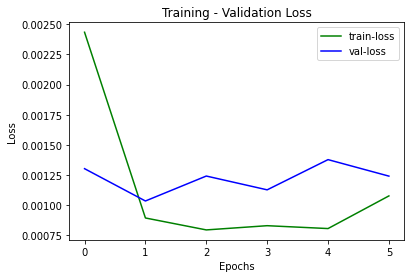

In [ ]:
#plot loss graph training vs validation
epochs = list(range(6))
pyplot.plot(epochs, train_loss, c="g", label="train-loss")
pyplot.plot(epochs, val_loss, c="b", label="val-loss")
pyplot.xlabel("Epochs")
pyplot.ylabel("Loss")
pyplot.title("Training - Validation Loss")
pyplot.legend()
pyplot.show()

In [ ]:
#copying length of test data sets and corresponing predictions
label = [9910,39900,40000,39850,39950,39925,39875,39825,39638,39775,39696]
preds = [9910,39900,40000,39850,39950,39925,39875,39825,39638,39775,39696]

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(label, preds)

In [ ]:
labels = ["benign", "gafgyt.combo", "gafgyt.junk", "gafgyt.scan", "gafgyt.tcp", "gafgyt.udp", "mirai.ack", "mirai.scan", "mirai.syn", "mirai.udp", "mirai.udpplain"]

[Text(0, 0.5, 'benign'),
 Text(0, 1.5, 'gafgyt.combo'),
 Text(0, 2.5, 'gafgyt.junk'),
 Text(0, 3.5, 'gafgyt.scan'),
 Text(0, 4.5, 'gafgyt.tcp'),
 Text(0, 5.5, 'gafgyt.udp'),
 Text(0, 6.5, 'mirai.ack'),
 Text(0, 7.5, 'mirai.scan'),
 Text(0, 8.5, 'mirai.syn'),
 Text(0, 9.5, 'mirai.udp'),
 Text(0, 10.5, 'mirai.udpplain')]

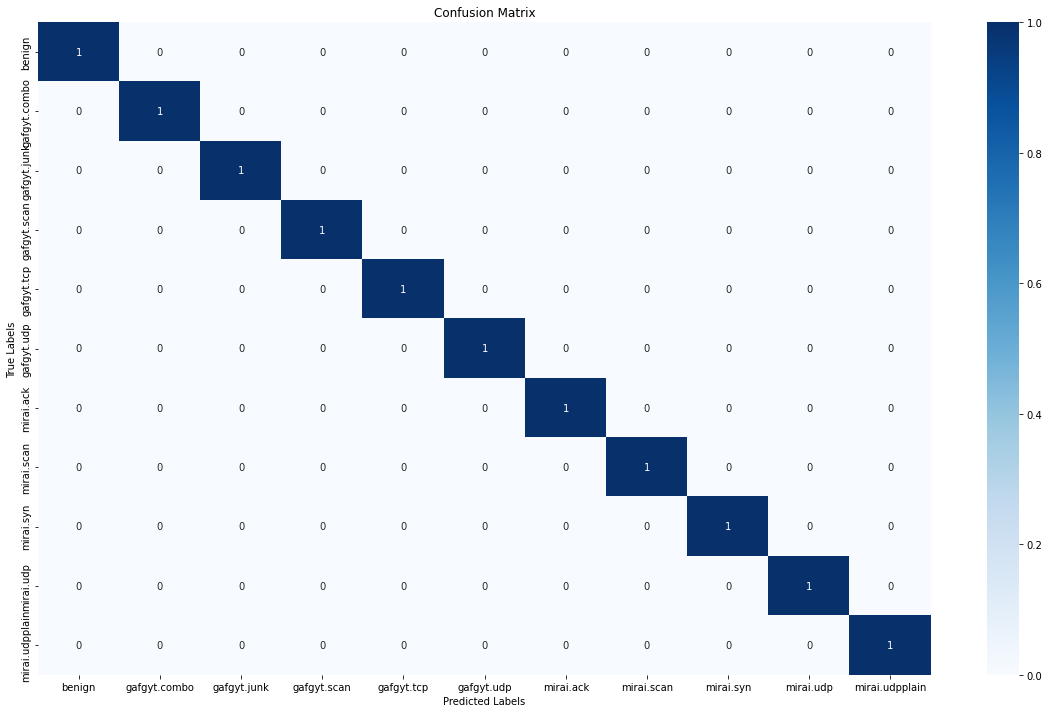

In [ ]:
#plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(labels))
ax.yaxis.set_ticklabels(list(labels))
